In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import skimage as sk
import skimage.io as skio
import seaborn as sns
import cv2

## Part 1(a)

In [2]:
def load_derivative_of_img(img_name):
    target_img = plt.imread(f"./{img_name}")
    dx_filter = np.array([[1, -1]])
    dy_filter = np.array([[1], [-1]])
    dx_convolved = np.stack(
        [scipy.signal.convolve2d(target_img[..., i], dx_filter, mode='same') for i in range(target_img.shape[-1])]
    )
    dy_convolved = np.stack(
        [scipy.signal.convolve2d(target_img[..., i], dy_filter, mode='same') for i in range(target_img.shape[-1])]
    )
    return dx_convolved, dy_convolved

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


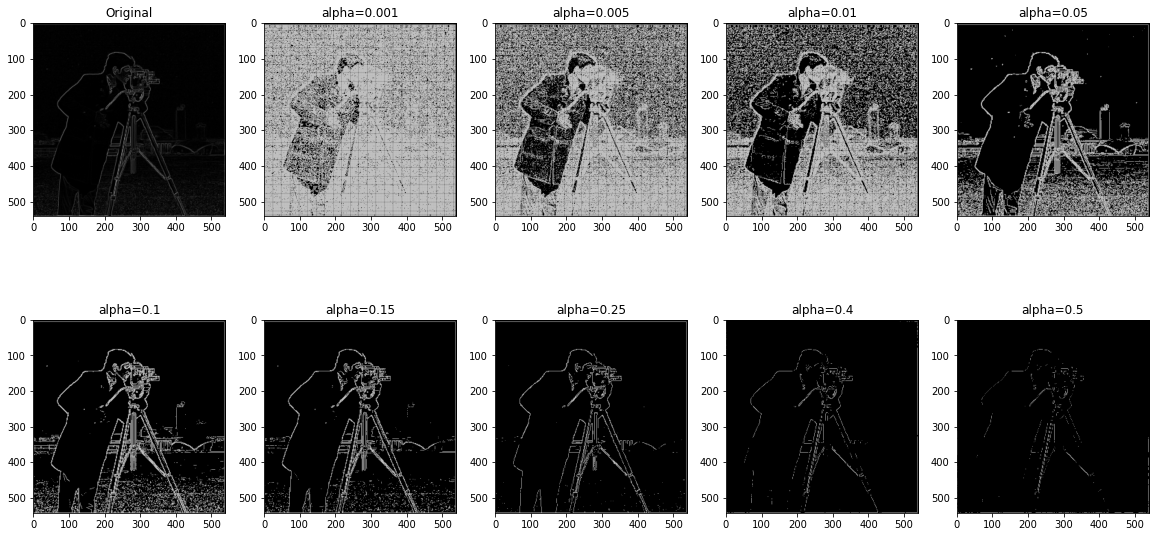

In [14]:
cameraman_dx, cameraman_dy = load_derivative_of_img("cameraman.png")
cameraman_edge = np.sqrt(cameraman_dx ** 2 + cameraman_dy ** 2).transpose(1, 2, 0)
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
alphas_to_try = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.25, 0.4, 0.5]

for i, alpha in enumerate(alphas_to_try):
    ax[i // 5, i % 5].imshow(
        np.where(cameraman_edge[..., :-1] >= alpha, 1, 0) * 255
    )
    ax[i // 5, i % 5].set_title(f"alpha={alpha}")
ax[0][0].imshow(cameraman_edge[..., :-1])
ax[0][0].set_title("Original")

plt.savefig("results/cameraman_edge_1.png")

## Part 1(b)

In [4]:
def get_2d_gaussian_convolved_img(img_name, sigma_x, sigma_y):
    target_img = plt.imread(f"./{img_name}")
    x_kernel = cv2.getGaussianKernel(30, sigma_x)
    y_kernel = cv2.getGaussianKernel(30, sigma_y)
    total_kernel = x_kernel @ y_kernel.T
    convolved = np.stack(
        [scipy.signal.convolve2d(target_img[..., i], total_kernel, mode='same', boundary="symm") for i in range(target_img.shape[-1])]
    )
    return convolved

def img_get_2d_gaussian_convolved_img(target_img, sigma_x, sigma_y, kernel_size=30):
    x_kernel = cv2.getGaussianKernel(kernel_size, sigma_x)
    y_kernel = cv2.getGaussianKernel(kernel_size, sigma_y)
    total_kernel = x_kernel @ y_kernel.T
    convolved = np.stack(
        [scipy.signal.convolve2d(target_img[..., i], total_kernel, mode='same', boundary="symm") for i in range(target_img.shape[-1])]
    )
    return convolved

def load_derivative_of_ready_img(target_img):
    dx_filter = np.array([[1, -1]])
    dy_filter = np.array([[1], [-1]])
    dx_convolved = np.stack(
        [scipy.signal.convolve2d(target_img[..., i], dx_filter, mode='same', boundary="symm") for i in range(target_img.shape[-1])]
    )
    dy_convolved = np.stack(
        [scipy.signal.convolve2d(target_img[..., i], dy_filter, mode='same', boundary="symm") for i in range(target_img.shape[-1])]
    )
    return dx_convolved, dy_convolved

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


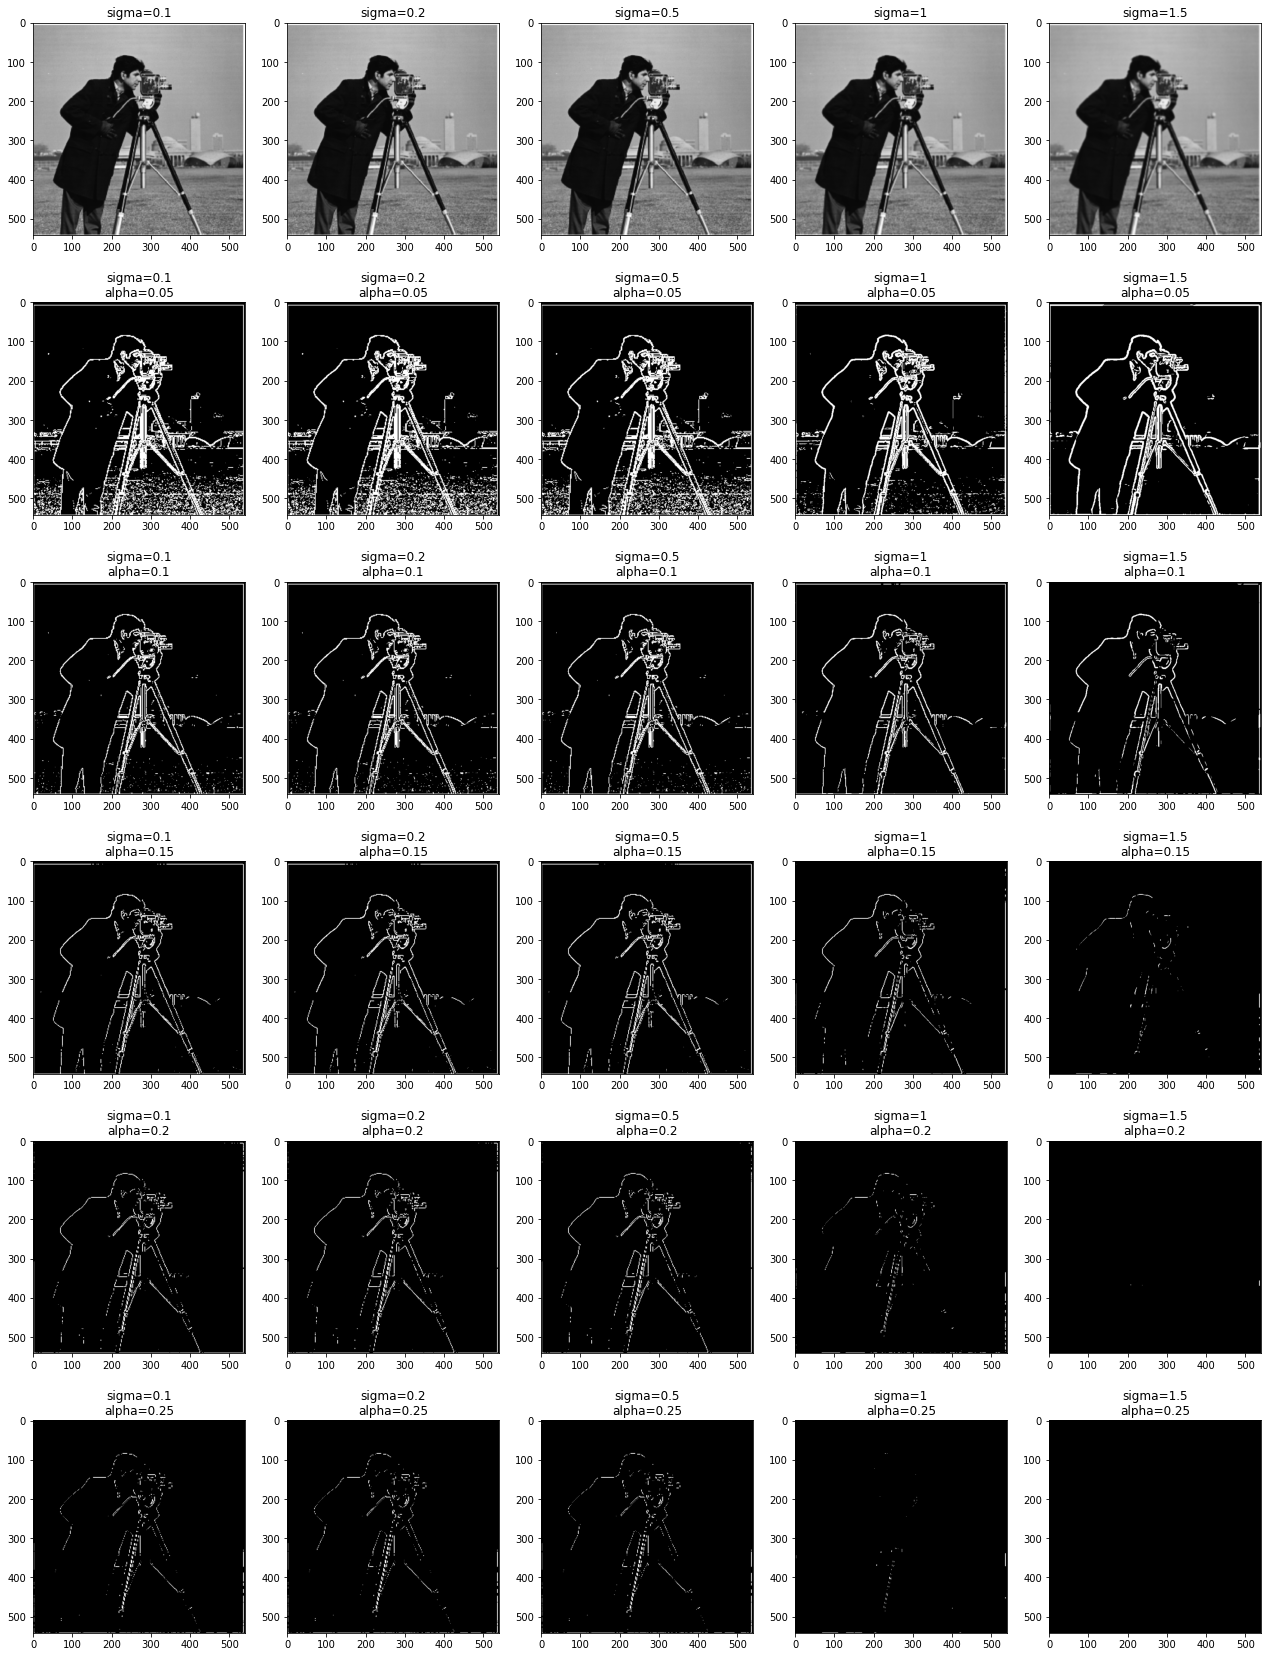

In [18]:
sigmas_to_try = [0.1, 0.2, 0.5, 1, 1.5]
alphas_to_try = [0.05, 0.1, 0.15, 0.2, 0.25]
fig, ax = plt.subplots(1 + len(alphas_to_try), len(sigmas_to_try), figsize=(22, 30))

for i, sigma in enumerate(sigmas_to_try):
    gauss_blurred_img = get_2d_gaussian_convolved_img("cameraman.png", sigma, sigma).transpose(1, 2, 0)
    ax[0][i].imshow(gauss_blurred_img)
    ax[0][i].set_title(f"sigma={sigma}")
    blur_dx, blur_dy = load_derivative_of_ready_img(gauss_blurred_img)
    blurred_edge = np.sqrt(blur_dx ** 2 + blur_dy ** 2).transpose(1, 2, 0)
    for j, alpha in enumerate(alphas_to_try):
        ax[j+1][i].imshow(
            np.where(blurred_edge[..., :-1] >= alpha, 1, 0) * 255
        )
        ax[j+1][i].set_title(f"sigma={sigma}\nalpha={alpha}")
plt.savefig("results/cameraman_edge_2.png")

In [6]:
def get_2d_gaussian_diff_convolved_img(img_name, sigma_x, sigma_y):
    target_img = plt.imread(f"./{img_name}")
    if "png" in img_name:
        dx_filter = np.array([[1, -1]])
        dy_filter = np.array([[1], [-1]])
        x_kernel = cv2.getGaussianKernel(30, sigma_x)
        y_kernel = cv2.getGaussianKernel(30, sigma_y)
        total_kernel = x_kernel @ y_kernel.T
        
        total_dx_kernel = scipy.signal.convolve2d(total_kernel, dx_filter, mode='same', boundary="symm")
        total_dy_kernel = scipy.signal.convolve2d(total_kernel, dy_filter, mode='same', boundary="symm")
        
        x_convolved = np.stack(
            [scipy.signal.convolve2d(target_img[..., i], total_dx_kernel, mode='same', boundary="symm") for i in range(target_img.shape[-1])]
        )
        y_convolved = np.stack(
            [scipy.signal.convolve2d(target_img[..., i], total_dy_kernel, mode='same', boundary="symm") for i in range(target_img.shape[-1])]
        )
        return x_convolved, y_convolved
    else:
        raise Exception(f"Unsupport image format: {img_name}")

def obtain_gauss_diff_filter(sigma_x, sigma_y):
    dx_filter = np.array([[1, -1]])
    dy_filter = np.array([[1], [-1]])
    x_kernel = cv2.getGaussianKernel(30, sigma_x)
    y_kernel = cv2.getGaussianKernel(30, sigma_y)
    total_kernel = x_kernel @ y_kernel.T
    total_dx_kernel = scipy.signal.convolve2d(total_kernel, dx_filter, mode='same', boundary="symm")
    total_dy_kernel = scipy.signal.convolve2d(total_kernel, dy_filter, mode='same', boundary="symm")
    return total_kernel, total_dx_kernel, total_dy_kernel

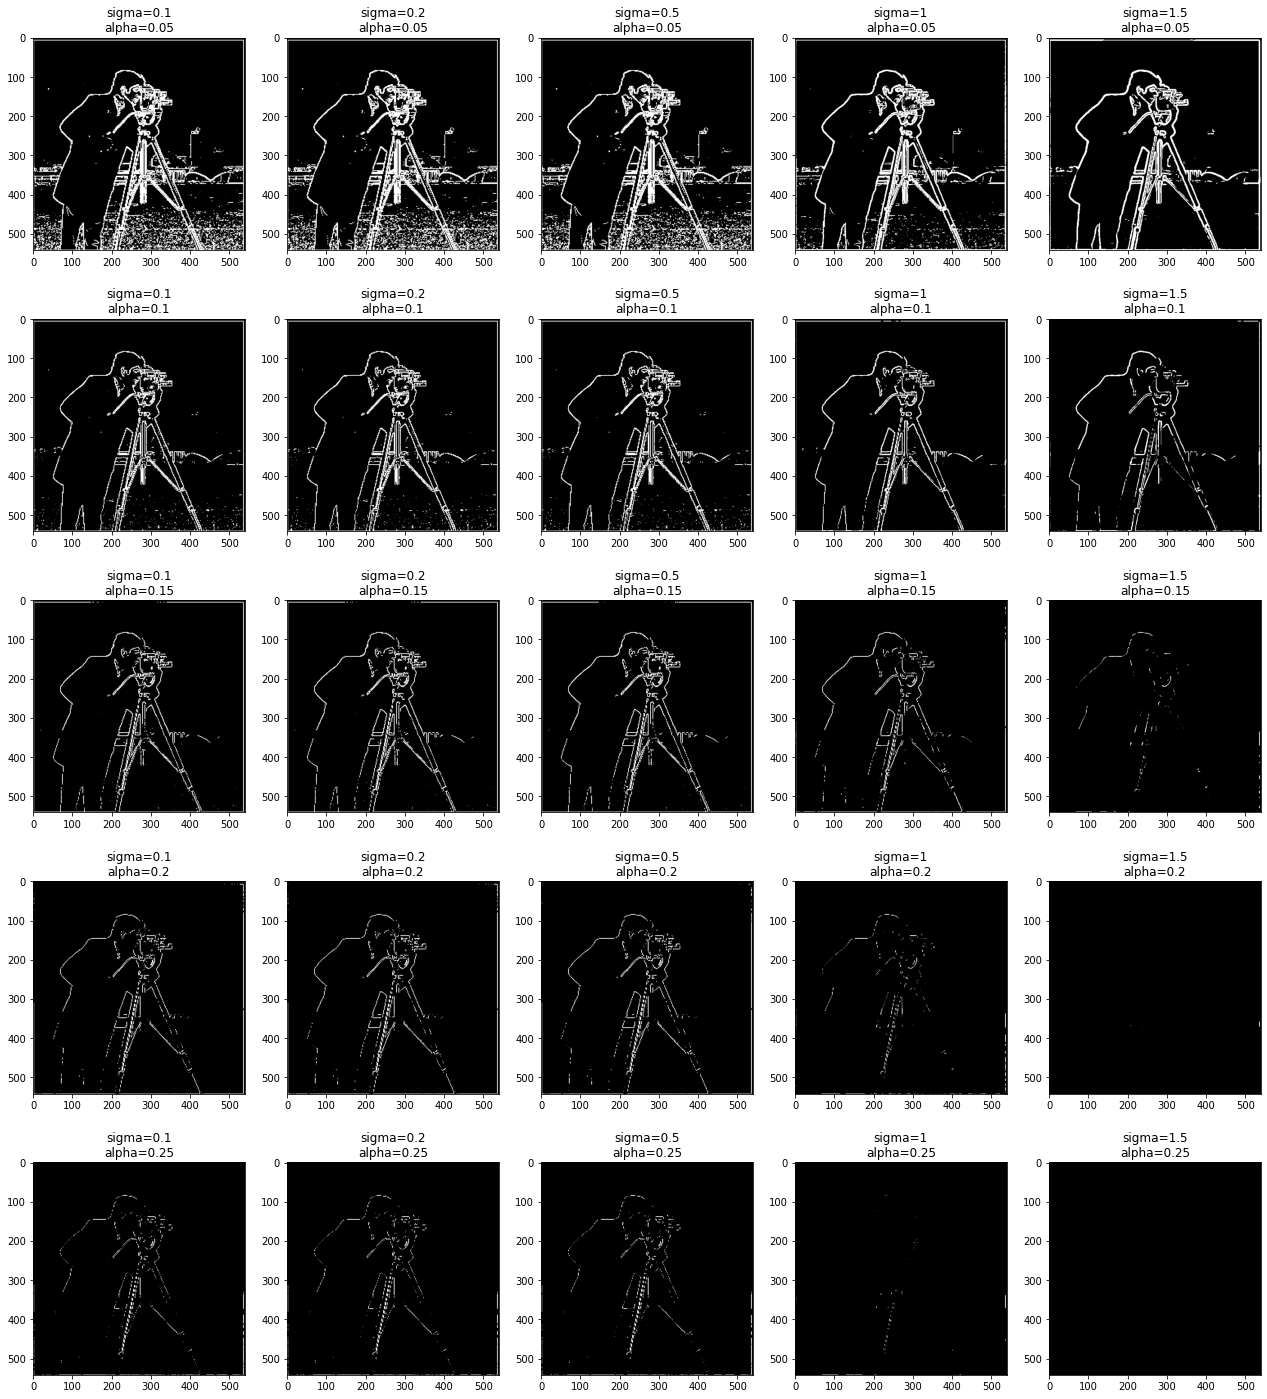

In [19]:
sigmas_to_try = [0.1, 0.2, 0.5, 1, 1.5]
alphas_to_try = [0.05, 0.1, 0.15, 0.2, 0.25]
fig, ax = plt.subplots(len(alphas_to_try), len(sigmas_to_try), figsize=(22, 25))

for i, sigma in enumerate(sigmas_to_try):
    dx_conv, dy_conv = get_2d_gaussian_diff_convolved_img("cameraman.png", sigma, sigma)
    blurred_edge = np.sqrt(dx_conv ** 2 + dy_conv ** 2).transpose(1, 2, 0)
    for j, alpha in enumerate(alphas_to_try):
        ax[j][i].imshow(
            np.where(blurred_edge[..., :-1] >= alpha, 1, 0) * 255
        )
        ax[j][i].set_title(f"sigma={sigma}\nalpha={alpha}")
plt.savefig("results/cameraman_edge_3.png")

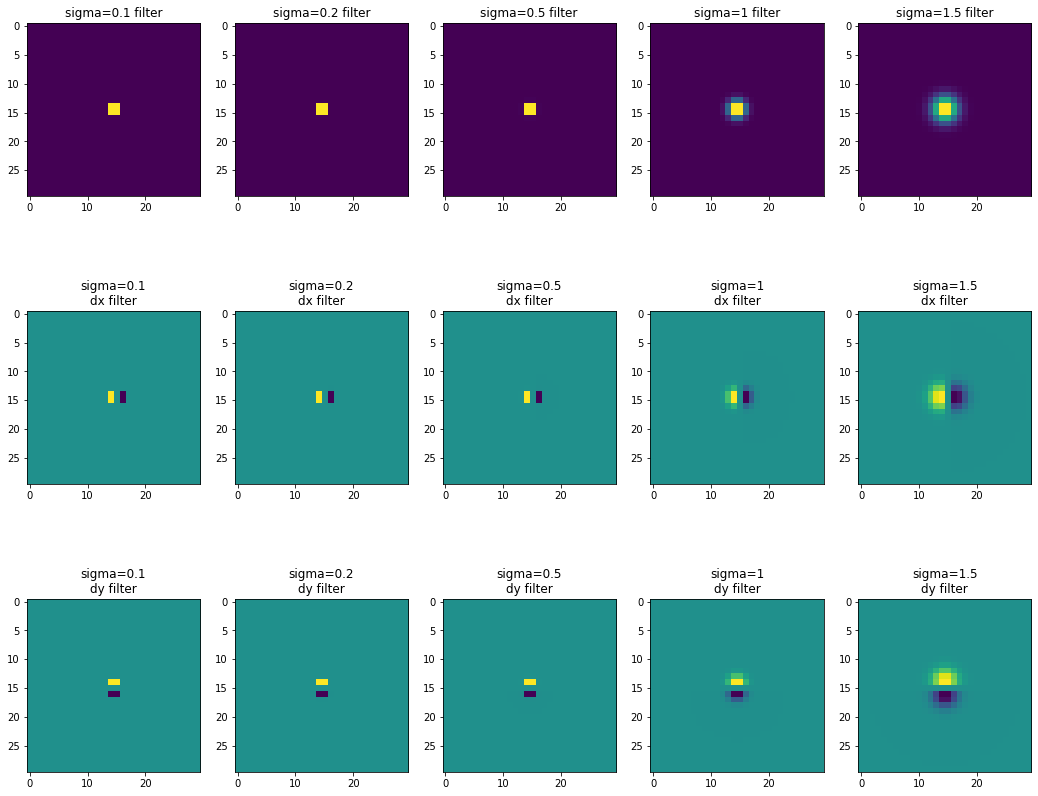

In [20]:
sigmas_to_try = [0.1, 0.2, 0.5, 1, 1.5]
fig, ax = plt.subplots(3, len(sigmas_to_try), figsize=(18, 15))

for i, sigma in enumerate(sigmas_to_try):
    total_kernel, total_dx_kernel, total_dy_kernel = obtain_gauss_diff_filter(sigma, sigma)
    ax[0][i].imshow(total_kernel)
    ax[0][i].set_title(f"sigma={sigma} filter")
    ax[1][i].imshow(total_dx_kernel)
    ax[1][i].set_title(f"sigma={sigma}\ndx filter")
    ax[2][i].imshow(total_dy_kernel)
    ax[2][i].set_title(f"sigma={sigma}\ndy filter")
plt.savefig("results/cameraman_edge_filters.png")

## part 2(a)

In [11]:
def get_2d_unsharp_mask_filter(img_name, sigma_x, sigma_y, alpha):
    target_img = plt.imread(f"./{img_name}")
    x_kernel = cv2.getGaussianKernel(30, sigma_x)
    y_kernel = cv2.getGaussianKernel(30, sigma_y)
    total_kernel = x_kernel @ y_kernel.T
    unit_impulse = scipy.signal.unit_impulse((30, 30), 'mid')
    true_kernel = (1 + alpha) * unit_impulse - alpha * total_kernel
    convolved = np.stack(
        [scipy.signal.convolve2d(target_img[..., i], true_kernel, mode='same', boundary="symm") for i in range(target_img.shape[-1])]
    )
    return convolved

def img_get_2d_unsharp_mask_filter(target_img, sigma_x, sigma_y, alpha):
    x_kernel = cv2.getGaussianKernel(30, sigma_x)
    y_kernel = cv2.getGaussianKernel(30, sigma_y)
    total_kernel = x_kernel @ y_kernel.T
    unit_impulse = scipy.signal.unit_impulse((30, 30), 'mid')
    true_kernel = (1 + alpha) * unit_impulse - alpha * total_kernel
    convolved = np.stack(
        [scipy.signal.convolve2d(target_img[..., i], true_kernel, mode='same', boundary="symm") for i in range(target_img.shape[-1])]
    )
    return convolved

def img_get_2d_highpass_filter(target_img, sigma_x, sigma_y, kernel_size=30):
    x_kernel = cv2.getGaussianKernel(kernel_size, sigma_x)
    y_kernel = cv2.getGaussianKernel(kernel_size, sigma_y)
    total_kernel = x_kernel @ y_kernel.T
    unit_impulse = scipy.signal.unit_impulse((kernel_size, kernel_size), 'mid')
    true_kernel = unit_impulse - total_kernel
    convolved = np.stack(
        [scipy.signal.convolve2d(target_img[..., i], true_kernel, mode='same', boundary="symm") for i in range(target_img.shape[-1])]
    )
    return convolved

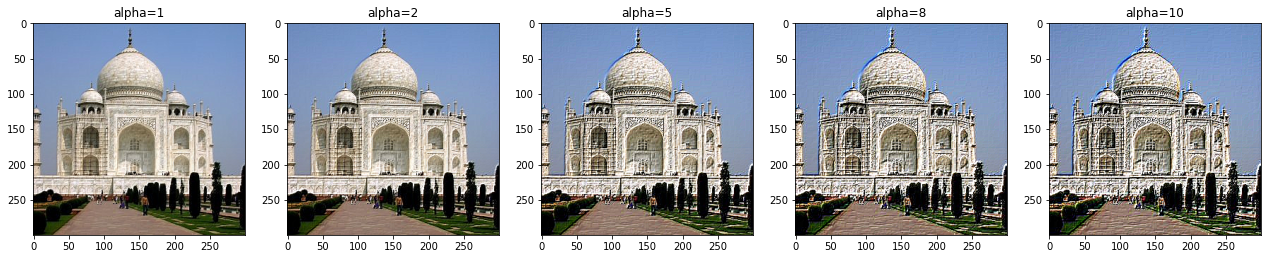

In [10]:
alphas_to_try = [1, 2, 5, 8, 10]
fig, ax = plt.subplots(1, len(alphas_to_try), figsize=(22, 10))

for i, alpha in enumerate(alphas_to_try):
    unsharpen_img = np.clip(get_2d_unsharp_mask_filter("taj.jpg", 0.5, 0.5, alpha), 0, 255).astype(int)
    ax[i].imshow(unsharpen_img.transpose(1, 2, 0))
    ax[i].set_title(f"alpha={alpha}")

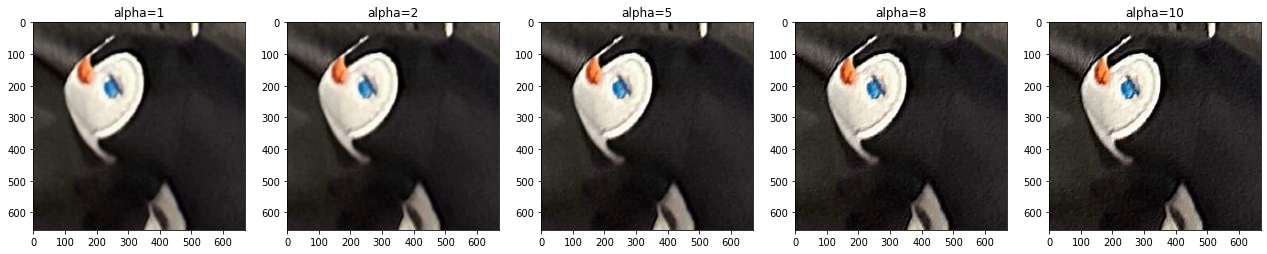

In [11]:
alphas_to_try = [1, 2, 5, 8, 10]
fig, ax = plt.subplots(1, len(alphas_to_try), figsize=(22, 15))

for i, alpha in enumerate(alphas_to_try):
    unsharpen_img = np.clip(get_2d_unsharp_mask_filter("ehhhhh.jpg", 0.5, 0.5, alpha), 0, 255).astype(int)
    ax[i].imshow(unsharpen_img.transpose(1, 2, 0))
    ax[i].set_title(f"alpha={alpha}")

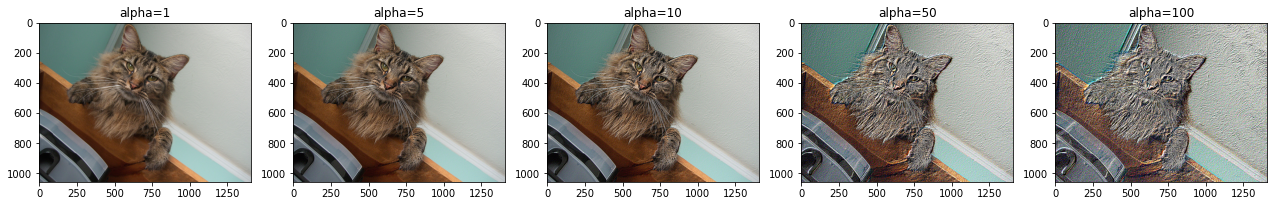

In [12]:
alphas_to_try = [1, 5, 10, 50, 100]
fig, ax = plt.subplots(1, len(alphas_to_try), figsize=(22, 15))

for i, alpha in enumerate(alphas_to_try):
    unsharpen_img = np.clip(get_2d_unsharp_mask_filter("nutmeg.jpg", 0.5, 0.5, alpha), 0, 255).astype(int)
    ax[i].imshow(unsharpen_img.transpose(1, 2, 0))
    ax[i].set_title(f"alpha={alpha}")

## part 2(b)

In [7]:
import matplotlib
matplotlib.use('TkAgg')
from align_image_code import align_images
aligned_hybrid_image = align_images(plt.imread("nutmeg.jpg"), plt.imread("DerekPicture.jpg"))

Please select 2 points in each image for alignment.


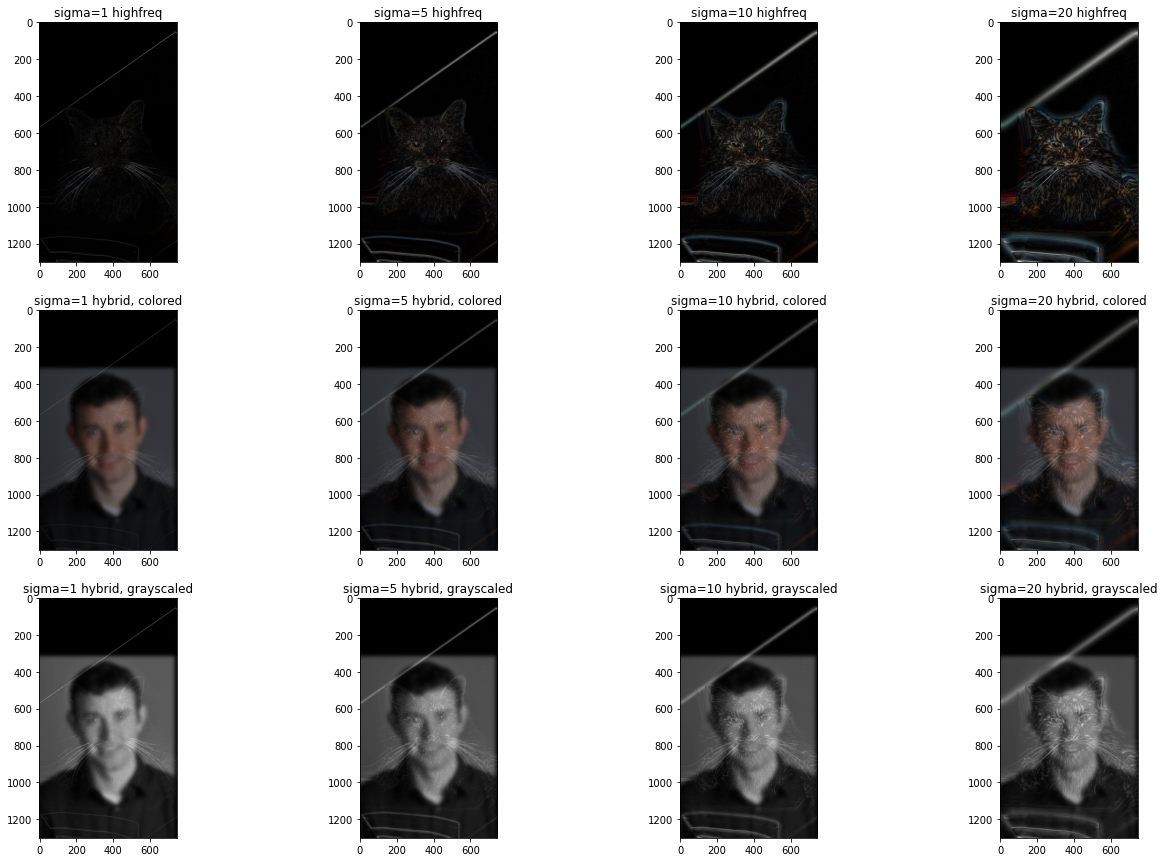

In [24]:
sigmas_to_try = [1, 5, 10, 20]
fig, ax = plt.subplots(3, len(sigmas_to_try), figsize=(22, 15))
gray_scale_coeff = np.array([0.2125, 0.7154, 0.0721])
lowfreq_derek = img_get_2d_gaussian_convolved_img(aligned_hybrid_image[1], 10, 10, kernel_size=60).transpose(1, 2, 0).astype(int)
for i, sigma in enumerate(sigmas_to_try):
    highfreq_nutmeg = aligned_hybrid_image[0] - img_get_2d_gaussian_convolved_img(aligned_hybrid_image[0], sigma, sigma, kernel_size=int(6 * sigma)).transpose(1, 2, 0)
    highfreq_nutmeg = (np.abs(highfreq_nutmeg) / np.abs(highfreq_nutmeg).max() * 255).astype(int)
    
    ax[0][i].imshow(highfreq_nutmeg)
    ax[0][i].set_title(f"sigma={sigma} highfreq")
    hybrid_img = np.clip((0.5 * (highfreq_nutmeg + lowfreq_derek)).astype(int), 0, 255)
    ax[1][i].imshow(hybrid_img)
    ax[1][i].set_title(f"sigma={sigma} hybrid, colored")
    
    hybrid_img = np.clip((0.5 * (highfreq_nutmeg + lowfreq_derek) @ gray_scale_coeff).astype(int), 0, 255)
    ax[2][i].imshow(hybrid_img, cmap="gray")
    ax[2][i].set_title(f"sigma={sigma} hybrid, grayscaled")

In [49]:
def get_freq_of_img(target_img):
    freq_result = np.log(np.abs(np.fft.fftshift(np.fft.fft2(target_img@gray_scale_coeff))))
    sns.heatmap(freq_result, cmap='gray')
    plt.show()

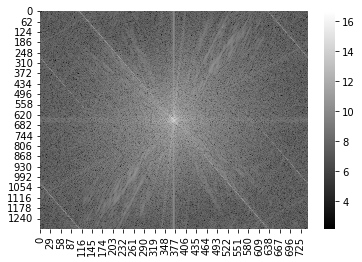

In [26]:
get_freq_of_img(highfreq_nutmeg)

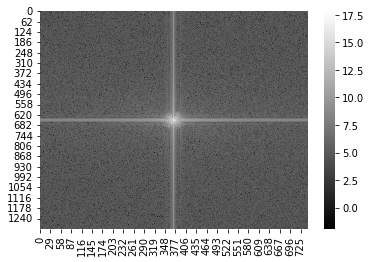

In [27]:
get_freq_of_img(lowfreq_derek)

### canny or not?

In [120]:
full_pic = plt.imread("2b_mix1.jpg")
canny, uncanny = full_pic[:, :full_pic.shape[1]//2], full_pic[:, full_pic.shape[1]//2:]
aligned_hybrid_image = align_images(plt.imread("cyrus.png")[..., :-1], plt.imread("2b_mix1b.jpg")[..., :-1])

Please select 2 points in each image for alignment.


In [122]:
sigmas_to_try = [1, 2, 5, 10, 20]
fig, ax = plt.subplots(3, len(sigmas_to_try), figsize=(22, 15))
gray_scale_coeff = np.array([0.2125, 0.7154, 0.0721])
lowfreq_derek = img_get_2d_gaussian_convolved_img(aligned_hybrid_image[0], 0.5, 0.5, kernel_size=3).transpose(1, 2, 0)
for i, sigma in enumerate(sigmas_to_try):
    highfreq_nutmeg = aligned_hybrid_image[1] - img_get_2d_gaussian_convolved_img(aligned_hybrid_image[1], sigma, sigma, kernel_size=max(10, int(6 * sigma))).transpose(1, 2, 0)
    highfreq_nutmeg = (np.abs(highfreq_nutmeg) / np.abs(highfreq_nutmeg).max() * 255).astype(int)
    
    ax[0][i].imshow(highfreq_nutmeg)
    ax[0][i].set_title(f"sigma={sigma} highfreq")
    hybrid_img = np.clip((0.5 * (highfreq_nutmeg / 255 + lowfreq_derek)), 0, 255)
    ax[1][i].imshow(hybrid_img)
    ax[1][i].set_title(f"sigma={sigma} hybrid, colored")
    
    hybrid_img = np.clip((0.5 * (highfreq_nutmeg / 255 + lowfreq_derek) @ gray_scale_coeff), 0, 255)
    ax[2][i].imshow(hybrid_img, cmap="gray")
    ax[2][i].set_title(f"sigma={sigma} hybrid, grayscaled")
plt.savefig("2b_mix1_hybrid.png")
plt.show()

let's try reverse too

In [45]:
alternate_aligned_hybrid_image = aligned_hybrid_image[1], aligned_hybrid_image[0]
sigmas_to_try = [1, 2, 5, 10, 20, 40]
fig, ax = plt.subplots(3, len(sigmas_to_try), figsize=(37, 15))
gray_scale_coeff = np.array([0.2125, 0.7154, 0.0721])
lowfreq_derek = img_get_2d_gaussian_convolved_img(alternate_aligned_hybrid_image[0], 0.5, 0.5, kernel_size=3).transpose(1, 2, 0)
for i, sigma in enumerate(sigmas_to_try):
    highfreq_nutmeg = alternate_aligned_hybrid_image[1] - img_get_2d_gaussian_convolved_img(alternate_aligned_hybrid_image[1], sigma, sigma, kernel_size=max(10, int(6 * sigma))).transpose(1, 2, 0)
    highfreq_nutmeg = (np.abs(highfreq_nutmeg) / np.abs(highfreq_nutmeg).max() * 255).astype(int)
    
    ax[0][i].imshow(highfreq_nutmeg)
    ax[0][i].set_title(f"sigma={sigma} highfreq")
    hybrid_img = np.clip((0.5 * (highfreq_nutmeg / 255 + lowfreq_derek)), 0, 255)
    ax[1][i].imshow(hybrid_img)
    ax[1][i].set_title(f"sigma={sigma} hybrid, colored")
    
    hybrid_img = np.clip((0.5 * (highfreq_nutmeg / 255 + lowfreq_derek) @ gray_scale_coeff), 0, 255)
    ax[2][i].imshow(hybrid_img, cmap="gray")
    ax[2][i].set_title(f"sigma={sigma} hybrid, grayscaled")
plt.savefig("2b_mix1_hybrid.png")
plt.show()

### deer ryan

In [77]:
import matplotlib
matplotlib.use('TkAgg')
from align_image_code import align_images
aligned_hybrid_image = align_images(plt.imread("2b_mix3_b2.jpg"), plt.imread("2b_mix3_a2.jpg"))

Please select 2 points in each image for alignment.


In [78]:
sigmas_to_try = [1, 2, 5, 10, 20, 40]
fig, ax = plt.subplots(3, len(sigmas_to_try), figsize=(44, 30))
gray_scale_coeff = np.array([0.2125, 0.7154, 0.0721])
lowfreq_derek = img_get_2d_gaussian_convolved_img(aligned_hybrid_image[0], 0.5, 0.5, kernel_size=3).transpose(1, 2, 0)
for i, sigma in enumerate(sigmas_to_try):
    highfreq_nutmeg = aligned_hybrid_image[1] - img_get_2d_gaussian_convolved_img(aligned_hybrid_image[1], sigma, sigma, kernel_size=max(6, int(6 * sigma))).transpose(1, 2, 0)
    highfreq_nutmeg = (np.abs(highfreq_nutmeg) / np.abs(highfreq_nutmeg).max() * 255).astype(int)
    
    ax[0][i].imshow(highfreq_nutmeg)
    ax[0][i].set_title(f"sigma={sigma} highfreq")
    hybrid_img = np.clip((0.5 * (highfreq_nutmeg / 255 + lowfreq_derek)), 0, 255)
    ax[1][i].imshow(hybrid_img)
    ax[1][i].set_title(f"sigma={sigma} hybrid, colored")
    
    hybrid_img = np.clip((0.5 * (highfreq_nutmeg / 255 + lowfreq_derek) @ gray_scale_coeff), 0, 255)
    ax[2][i].imshow(hybrid_img, cmap="gray")
    ax[2][i].set_title(f"sigma={sigma} hybrid, grayscaled")
plt.savefig("2b_mix3_hybrid.png")
plt.show()

In [67]:
get_freq_of_img(highfreq_nutmeg)

In [68]:
get_freq_of_img(lowfreq_derek)

### nah id win

In [116]:
full_pic = plt.imread("2b_mix1.jpg")
canny, uncanny = full_pic[:, :full_pic.shape[1]//2], full_pic[:, full_pic.shape[1]//2:]
aligned_hybrid_image = align_images(plt.imread("2b_mix2_a.jpg"), plt.imread("2b_mix1b.jpg")[..., :-1])

Please select 2 points in each image for alignment.


In [117]:
sigmas_to_try = [0.5, 1, 2, 5, 10, 20]
fig, ax = plt.subplots(3, len(sigmas_to_try), figsize=(32, 15))
gray_scale_coeff = np.array([0.2125, 0.7154, 0.0721])
lowfreq_derek = img_get_2d_gaussian_convolved_img(aligned_hybrid_image[0], 0.5, 0.5, kernel_size=3).transpose(1, 2, 0)
for i, sigma in enumerate(sigmas_to_try):
    highfreq_nutmeg = aligned_hybrid_image[1] - img_get_2d_gaussian_convolved_img(aligned_hybrid_image[1], sigma, sigma, kernel_size=max(3, int(6 * sigma))).transpose(1, 2, 0)
    highfreq_nutmeg = np.clip(np.abs(highfreq_nutmeg) / np.abs(highfreq_nutmeg).max() * 255, 0, 255)
    
    ax[0][i].imshow(highfreq_nutmeg.astype(int))
    ax[0][i].set_title(f"sigma={sigma} highfreq")
    hybrid_img = np.clip((0.5 * (highfreq_nutmeg + lowfreq_derek * 255)), 0, 255)
    ax[1][i].imshow(hybrid_img.astype(int))
    ax[1][i].set_title(f"sigma={sigma} hybrid, colored")
    
    hybrid_img = np.clip((0.5 * (highfreq_nutmeg + lowfreq_derek * 255) @ gray_scale_coeff), 0, 255)
    ax[2][i].imshow(hybrid_img.astype(int), cmap="gray")
    ax[2][i].set_title(f"sigma={sigma} hybrid, grayscaled")
plt.savefig("2b_mix2_hybrid.png")
plt.show()

## part 2(c)

In [124]:
class ImagePyramid:
    def __init__(self, gauss_kernel_fn, img, init_layer_num=7):
        self.kernel_fn = gauss_kernel_fn
        self.img = img
        self.gaussian_pyramid = [img]
        self.laplacian_pyramid = []
        self.layer_num = 0
        self.construct_next_layer(init_layer_num)
    
    def construct_next_layer(self, n_layer_to_construct):
        for _ in range(n_layer_to_construct):
            original_last_layer_size = self.gaussian_pyramid[-1].shape
            original_last_layer_half_size = (original_last_layer_size[0] // 2, original_last_layer_size[1] // 2)
            self.gaussian_pyramid.append(
                sk.transform.resize(
                    self.kernel_fn(self.gaussian_pyramid[-1]), original_last_layer_half_size
                )
            )
            self.laplacian_pyramid.append(
                self.gaussian_pyramid[-2] - \
                    sk.transform.resize(self.gaussian_pyramid[-1], original_last_layer_size)
            )
            self.layer_num += 1
    
    def get_gaussian_layer(self, layer_idx):
        return self.gaussian_pyramid[layer_idx]
    
    def get_laplacian_layer(self, layer_idx):
        if layer_idx == self.layer_num:
            return self.gaussian_pyramid[-1]
        return self.laplacian_pyramid[layer_idx]

In [504]:
apple = plt.imread("./spline/apple.jpeg")
orange = plt.imread("./spline/orange.jpeg")
apple_pyramid = ImagePyramid(lambda img: img_get_2d_gaussian_convolved_img(img, 5, 5, kernel_size=30).transpose(1, 2, 0), apple, 5)
orange_pyramid = ImagePyramid(lambda img: img_get_2d_gaussian_convolved_img(img, 5, 5, kernel_size=30).transpose(1, 2, 0), orange, 5)
mask = np.zeros(apple.shape)
mask[:, :mask.shape[1] // 2] = 1
mask_pyramid = ImagePyramid(lambda img: img_get_2d_gaussian_convolved_img(img, 5, 5, kernel_size=30).transpose(1, 2, 0), mask, 5)

In [125]:
def sample_from_pyramids(image_a_pyramid, image_b_pyramid, mask_pyramid):
    layer_num_to_begin = min(image_a_pyramid.layer_num, image_b_pyramid.layer_num, mask_pyramid.layer_num)
    prev_layer = None
    for i in reversed(range(layer_num_to_begin + 1)):
        curr_layer = image_a_pyramid.get_laplacian_layer(i) * mask_pyramid.get_gaussian_layer(i) \
            + image_b_pyramid.get_laplacian_layer(i) * (1 - mask_pyramid.get_gaussian_layer(i))
        prev_layer = sk.transform.resize(prev_layer, curr_layer.shape) if prev_layer is not None else None
        if prev_layer is None:
            yield curr_layer
            prev_layer = curr_layer
        else:
            yield prev_layer + curr_layer
            prev_layer = prev_layer + curr_layer

In [505]:
oraple_layer_results = list(sample_from_pyramids(apple_pyramid, orange_pyramid, mask_pyramid))
fig, ax = plt.subplots(1, len(oraple_layer_results), figsize=(22, 15))

for i, layer in enumerate(oraple_layer_results):
    ax[i].imshow(layer.astype(int))
    ax[i].set_title(f"sum of layers until {len(oraple_layer_results) - 1 - i}")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [506]:
def plot_cumulative_laplacian_pyramid_sum(pyramid, ax):
    prev_layer = None
    for i in reversed(range(pyramid.layer_num + 1)):
        cur_layer = pyramid.get_laplacian_layer(i)
        prev_layer = sk.transform.resize(prev_layer, cur_layer.shape) if prev_layer is not None else None
        if prev_layer is None:
            ax[i].imshow(cur_layer.astype(int))
            prev_layer = cur_layer
        else:
            ax[i].imshow((prev_layer + cur_layer).astype(int))
            prev_layer = prev_layer + cur_layer
        ax[i].set_title(f"sum of layers until {i}")

def plot_individual_pyramid_layers(pyramid, ax):
    for i in reversed(range(pyramid.layer_num + 1)):
        cur_layer = pyramid.get_laplacian_layer(i)
        cur_layer = cur_layer - np.min(cur_layer)
        cur_layer = cur_layer / np.max(cur_layer) * 255
        ax[i].imshow(cur_layer.astype(int))
        ax[i].set_title(f"layer {i}")

def plot_individual_gauss_pyramid_layers(pyramid, ax):
    for i in reversed(range(pyramid.layer_num + 1)):
        cur_layer = pyramid.get_gaussian_layer(i)
        ax[i].imshow(cur_layer)
        ax[i].set_title(f"layer {i}")

In [507]:
fig, ax = plt.subplots(5, apple_pyramid.layer_num + 1, figsize=(22, 15))
plot_cumulative_laplacian_pyramid_sum(apple_pyramid, ax[0])
plot_individual_pyramid_layers(apple_pyramid, ax[1])
plot_cumulative_laplacian_pyramid_sum(orange_pyramid, ax[2])
plot_individual_pyramid_layers(orange_pyramid, ax[3])
plot_individual_gauss_pyramid_layers(mask_pyramid, ax[4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [508]:
plt.show()

### Can

In [732]:
plt.imread("wood_sword.webp").shape

(360, 360, 4)

In [731]:
plt.imshow(plt.imread("other_sword.png"))
plt.show()

In [733]:
new_feet, new_hand = align_images(plt.imread("wood_sword.webp")[..., :-1], plt.imread("other_sword.png")[..., :-1])

Please select 2 points in each image for alignment.


In [734]:
plt.imshow(np.clip(0.5 * (new_hand +new_feet[::-1, ::-1]), 0, 1))
plt.show()
true_original = np.clip(0.5 * (new_hand + np.roll(new_feet, (0, 3), (0, 1))), 0, 1)

In [737]:
apple = new_hand
orange = new_feet
apple_pyramid = ImagePyramid(lambda img: img_get_2d_gaussian_convolved_img(img, 10, 10, kernel_size=60).transpose(1, 2, 0), apple, 7)
orange_pyramid = ImagePyramid(lambda img: img_get_2d_gaussian_convolved_img(img, 10, 10, kernel_size=60).transpose(1, 2, 0), orange, 7)

In [738]:
mask = np.zeros(apple.shape)
mask[np.triu_indices_from(apple[..., 0])] = 1
mask_pyramid = ImagePyramid(lambda img: img_get_2d_gaussian_convolved_img(img, 10, 10, kernel_size=60).transpose(1, 2, 0), mask, 7)
oraple_layer_results = list(sample_from_pyramids(apple_pyramid, orange_pyramid, mask_pyramid))
fig, ax = plt.subplots(1, len(oraple_layer_results), figsize=(22, 15))

for i, layer in enumerate(oraple_layer_results):
    ax[i].imshow(layer)
    ax[i].set_title(f"sum of layers until {len(oraple_layer_results) - 1 - i}")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [728]:
plt.imshow(layer)
# plt.axvline(490)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


## deer ryan (again)

In [165]:
plt.imshow(sk.transform.resize(plt.imread("./2d_deer.jpg"), (185, 310))[:185, :272] * plt.imread("./ryan-head-mask.png")[..., :-1])
plt.show()

In [325]:
plt.imshow(apple)
plt.show()

In [332]:
orange = (sk.transform.resize(plt.imread("./2d_deer.jpg"), (185, 335))[:185, :272] * 255).astype(int)
apple = plt.imread("./2b_mix3_b.jpg")
apple = np.hstack([apple[:, :225, :][:, ::-1, :], apple[:, 225:, :]])
apple_pyramid = ImagePyramid(lambda img: img_get_2d_gaussian_convolved_img(img, 0.5, 0.5, kernel_size=3).transpose(1, 2, 0), apple)
orange_pyramid = ImagePyramid(lambda img: img_get_2d_gaussian_convolved_img(img, 0.5, 0.5, kernel_size=3).transpose(1, 2, 0), orange)
mask = plt.imread("./ryan-head-mask-revised.png")[..., :-1]
mask = np.hstack([mask[:, :225, :][:, ::-1, :], mask[:, 225:, :]])
mask_pyramid = ImagePyramid(lambda img: img_get_2d_gaussian_convolved_img(img, 0.5, 0.5, kernel_size=3).transpose(1, 2, 0), mask)

oraple_layer_results = list(sample_from_pyramids(apple_pyramid, orange_pyramid, mask_pyramid))
fig, ax = plt.subplots(1, len(oraple_layer_results), figsize=(22, 5))

for i, layer in enumerate(oraple_layer_results):
    ax[i].imshow(layer.astype(int))
    ax[i].set_title(f"sum of layers until {len(oraple_layer_results) - 1 - i}")

plt.savefig("2d_deer_ryan_15.png")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [333]:
plt.imshow(layer.astype(int))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


### penguin

In [489]:
plt.imshow(
    (
        np.roll(plt.imread("./fix-fix-guin.jpg"), (250, 30), axis=(0, 1)) *
        np.round(plt.imread("./pen-mask-drawn.png")[..., :-1])
    ).astype(int)
)
plt.show()

In [493]:
orange = np.roll(plt.imread("./fix-fix-guin.jpg"), (250, 30), axis=(0, 1))
apple = plt.imread("./fix-pen.jpg")
apple_pyramid = ImagePyramid(lambda img: img_get_2d_gaussian_convolved_img(img, 0.5, 0.5, kernel_size=3).transpose(1, 2, 0), apple, 7)
orange_pyramid = ImagePyramid(lambda img: img_get_2d_gaussian_convolved_img(img, 0.5, 0.5, kernel_size=3).transpose(1, 2, 0), orange, 7)
mask = np.round(plt.imread("./pen-mask-drawn.png")[..., :-1])
mask_pyramid = ImagePyramid(lambda img: img_get_2d_gaussian_convolved_img(img, 0.5, 0.5, kernel_size=3).transpose(1, 2, 0), mask)

oraple_layer_results = list(sample_from_pyramids(apple_pyramid, orange_pyramid, mask_pyramid))
fig, ax = plt.subplots(1, len(oraple_layer_results), figsize=(22, 5))

for i, layer in enumerate(oraple_layer_results):
    ax[i].imshow(np.clip(layer, 0, 255).astype(int))
    ax[i].set_title(f"sum of layers until {len(oraple_layer_results) - 1 - i}")

plt.savefig("penguin_light_thing.png")
plt.show()

In [440]:
plt.imsave("penguin_mask_hand.png", layer.astype(np.uint8))

In [483]:
plt.imshow(layer.astype(int))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
